In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 4s 7ms/step - loss: 0.6952 - val_loss: 0.6951
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 4/5
235/235 [==============================] - 1s 6ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6944 - val_loss: 0.6943


In [2]:
#given code with noise
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.6990 - val_loss: 0.6988
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6986 - val_loss: 0.6984
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6982 - val_loss: 0.6980
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6979 - val_loss: 0.6977
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6975 - val_loss: 0.6973
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6972 - val_loss: 0.6970
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6968 - val_loss: 0.6967
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6965 - val_loss: 0.6964
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6962 - val_loss: 0.6961
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6959 - val_loss: 0.6958

In [3]:
# add one more layer to autoencoder
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Data loading
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(500, activation='relu')(input_layer)
encode_layer2 = Dense(250, activation='relu')(encode_layer1)
encode_layer3 = Dense(100, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(100, activation='relu')(latent_view)
decode_layer2 = Dense(250, activation='relu')(decode_layer1)
decode_layer3 = Dense(500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

model.summary()
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
history = model.fit(x_train, x_train, epochs=5, batch_size=256,shuffle=True, validation_data=(x_test, x_test), callbacks=[early_stopping])


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dense_5 (Dense)             (None, 250)               125250    
                                                                 
 dense_6 (Dense)             (None, 100)               25100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 100)               1100      
                                                                 
 dense_9 (Dense)             (None, 250)               2525

313/313 [==============================] - 1s 3ms/step


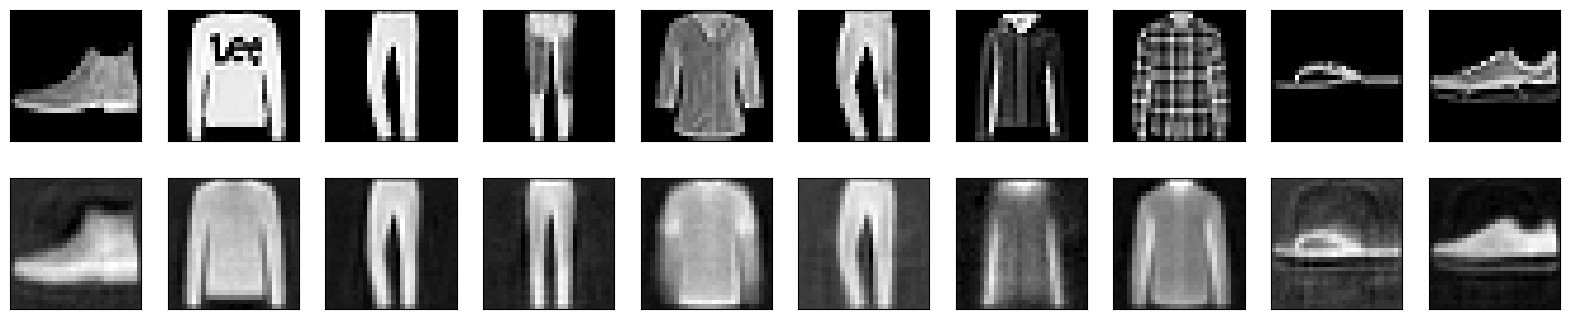

In [4]:
# Predicting on the test data
decoded_imgs = model.predict(x_test)
# Visualizing the original and reconstructed test data
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 500)               392500    
                                                                 
 dense_13 (Dense)            (None, 250)               125250    
                                                                 
 dense_14 (Dense)            (None, 100)               25100     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
 dense_16 (Dense)            (None, 100)               1100      
                                                                 
 dense_17 (Dense)            (None, 250)               2525

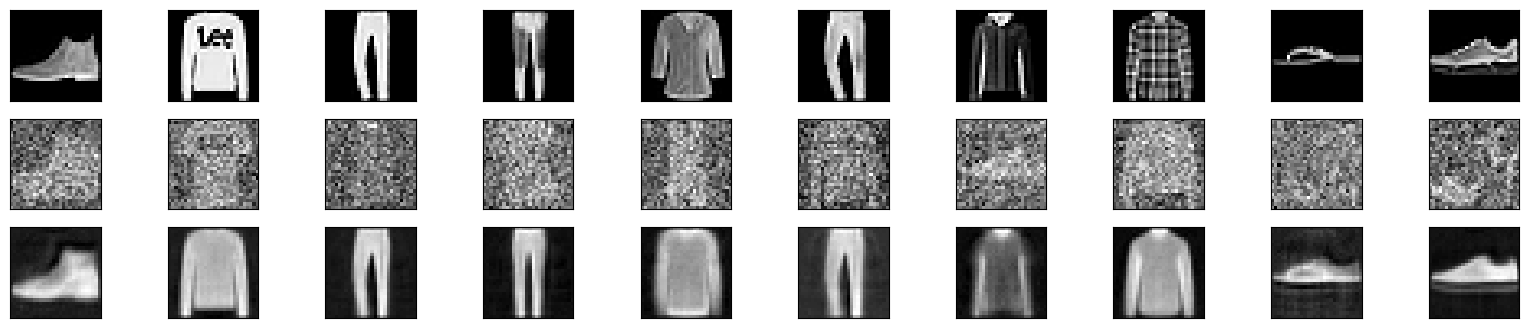

In [5]:
# Repeat the question 2 on the denoisening autoencoder
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(500, activation='relu')(input_layer)
encode_layer2 = Dense(250, activation='relu')(encode_layer1)
encode_layer3 = Dense(100, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(100, activation='relu')(latent_view)
decode_layer2 = Dense(250, activation='relu')(decode_layer1)
decode_layer3 = Dense(500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model_denoise = Model(input_layer, output_layer)

model_denoise.summary()
model_denoise.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history_denoise = model_denoise.fit(x_train_noisy, x_train, epochs=5, batch_size=256,shuffle=True, validation_data=(x_test_noisy, x_test), callbacks=[early_stopping])

# Predicting on the test data
decoded_imgs = model_denoise.predict(x_test_noisy)
# Visualizing the original and reconstructed test data
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Noise
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

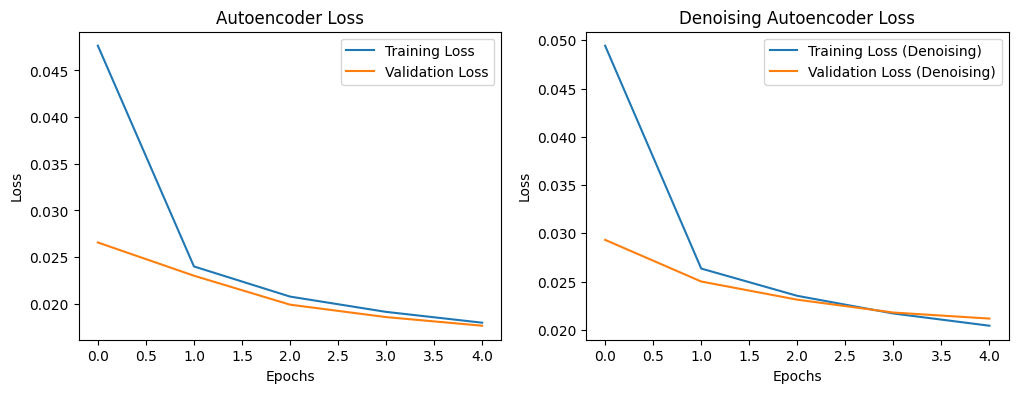

In [6]:
# Plotting loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_denoise.history['loss'], label='Training Loss (Denoising)')
plt.plot(history_denoise.history['val_loss'], label='Validation Loss (Denoising)')
plt.title('Denoising Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()